In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime


In [2]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'ErsenS_BoB'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1


In [3]:
#specify the grid


#xmin, xmax = (-126,-121)
#ymin, ymax = (36.25,38.5)


In [4]:
#file = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'

file = '../Data/dataset-duacs-nrt(7:10:219).nc'

#file = '../Data//20190708-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

In [5]:
ds = xr.open_dataset(file)

In [6]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 81, longitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-10
  * latitude   (latitude) float32 5.125 5.375 5.625 5.875 ... 24.62 24.88 25.12
  * longitude  (longitude) float32 80.12 80.38 80.62 80.88 ... 99.38 99.62 99.88
Data variables:
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-07-13T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-07-12T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [7]:
ds.latitude

<xarray.DataArray 'latitude' (latitude: 81)>
array([ 5.125,  5.375,  5.625,  5.875,  6.125,  6.375,  6.625,  6.875,  7.125,
        7.375,  7.625,  7.875,  8.125,  8.375,  8.625,  8.875,  9.125,  9.375,
        9.625,  9.875, 10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625,
       11.875, 12.125, 12.375, 12.625, 12.875, 13.125, 13.375, 13.625, 13.875,
       14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875, 16.125,
       16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875, 18.125, 18.375,
       18.625, 18.875, 19.125, 19.375, 19.625, 19.875, 20.125, 20.375, 20.625,
       20.875, 21.125, 21.375, 21.625, 21.875, 22.125, 22.375, 22.625, 22.875,
       23.125, 23.375, 23.625, 23.875, 24.125, 24.375, 24.625, 24.875, 25.125],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 5.125 5.375 5.625 5.875 ... 24.62 24.88 25.12
Attributes:
    axis:                 Y
    bounds:               lat_bnds
    long_name:            Latitude
    standard_name:        latitude
    units:                degrees_north
    valid_max:            89.875
    valid_min:            -89.875
    _ChunkSizes:          50
    _CoordinateAxisType:  Lat

In [8]:
sla = ds.sla

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_48643/1350970909.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


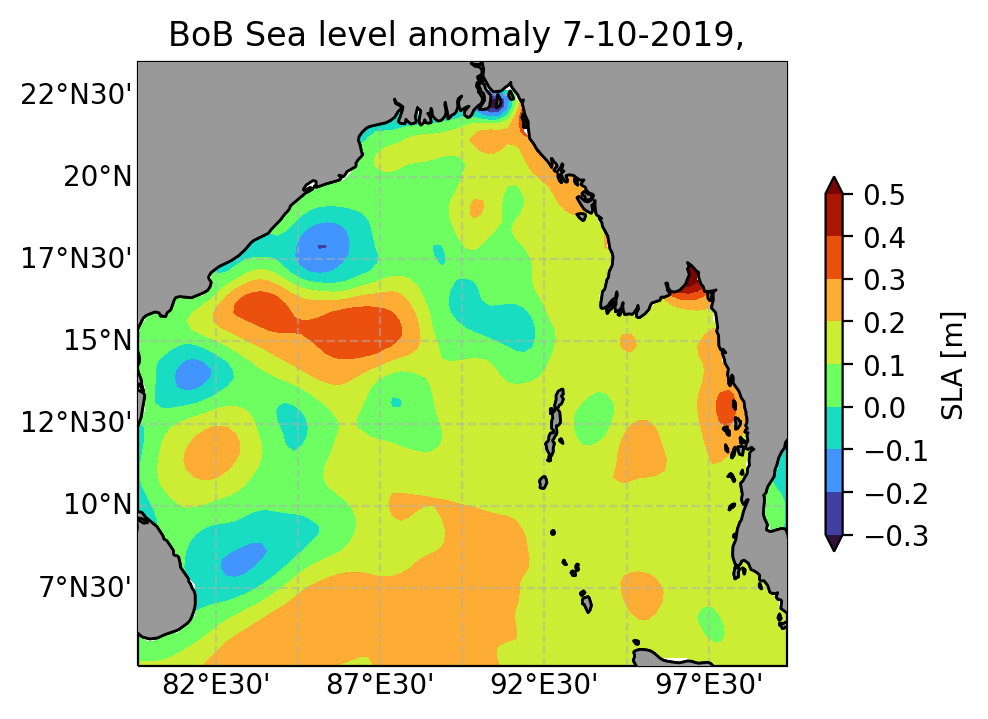

In [17]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB Sea level anomaly 7-10-2019, ')
#set the size of the axis 
#extent = [xmin, xmax, ymin, ymax]
#ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar